# 【問題】栗まんじゅうが太陽系を覆う日

「バイバイン」は薬品で、これを振掛けるとその物体は5分ごとに倍に増えるという働きがあります。
1個の栗まんじゅうにバイバインを振りかけた場合、太陽系が栗まんじゅうで覆われるのは何分後でしょうか。

# 重要な仮定
　
シンプルに、1, 2, 4, 8, 16,,,と増えていくと仮定する。　米粒のときはこの足し算になる(1, 3, 7, ,,,)がそのようなことはないとする。

In [19]:
import math

volume_manjyu=(math.pi)*(3**2)*2/(10**3)  # 半径3cm、高さ2cmのまんじゅうの体積[m^3]
print('まんじゅう１個の体積は{:.5f}[m^3]です'.format(volume_manjyu))

まんじゅう１個の体積は0.05655[m^3]です


In [20]:
time_span=5 #5secで分裂する

In [40]:
# グラフにできるようにリスト形式で返す
def time_estimation(target_volume, volume_manjyu=0.05665, time_span=5): #target_volumeになるのにどれだけ時間がかかるか？（分）
    t=i=0
    time_series=[0] #このリストに時間系列を入れる　　　例[0, 5, 10, ,,,.]
    time_volume=[volume_manjyu] #このリストに時間系列に沿ったまんじゅうの合計体積を入れる
    while target_volume>time_volume[-1]:
        t +=time_span
        i +=1
        time_series.append(t)
        time_volume.append(volume_manjyu*2**i)
    return time_series, time_volume #リストで返す（グラフにできるように）

In [41]:
time_estimation(20, 1, 1)#実行結果例

([0, 1, 2, 3, 4, 5], [1, 2, 4, 8, 16, 32])

In [42]:
time_estimation(20, 1, 2)#実行結果例

([0, 2, 4, 6, 8, 10], [1, 2, 4, 8, 16, 32])

In [43]:
time_estimation(20, 0.5, 2)#実行結果例

([0, 2, 4, 6, 8, 10, 12], [0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0])

In [44]:
time_estimation(20, 0.5, 2)#実行結果例

([0, 2, 4, 6, 8, 10, 12], [0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0])

# 太陽系の大きさ

https://utyuu-tanosimu.net/entry252.html

太陽系の大きさ 太陽系には現在、水星、金星、地球、火星、木星、土星、天王星、海王星と、8個の惑星が公転しています。 太陽から最も外側を公転している海王星までの距離は4,498,252,900 km（平均公転半径）で、光速でも約4時間もかかるくらい遠いところにあるのです。


In [45]:
r_taiyoukei=4498252900*1000#太陽系の半径
volume_taiyoukei=4/3*math.pi*(r_taiyoukei**3)
print('太陽系の大きさは{:.3g}[m^3]です'.format(volume_taiyoukei))

太陽系の大きさは3.81e+38[m^3]です


In [46]:
time_series, time_volume = time_estimation(volume_taiyoukei)

In [47]:
time_series[-1]

665

In [48]:
print('太陽系をまんじゅうが埋め尽くすのは{}分後です'.format(time_series[-1]))

太陽系をまんじゅうが埋め尽くすのは665分後です


In [49]:
volume_manjyu*2**(665/5)#検算

6.157604644214208e+38

In [50]:
volume_manjyu*2**(660/5)#検算

3.078802322107104e+38

## 東京ドームの体積
体積：ドーム部分の単純体積である124万m3を用いる。 

In [51]:
volume_tokyo_dome=124*10000

In [52]:
time_series_dome, time_volume_dome = time_estimation(volume_tokyo_dome)

In [53]:
print('東京ドームをまんじゅうが埋め尽くすのは{}分後です'.format(time_series_dome[-1]))

東京ドームをまんじゅうが埋め尽くすのは125分後です


In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'volume[m^3]')

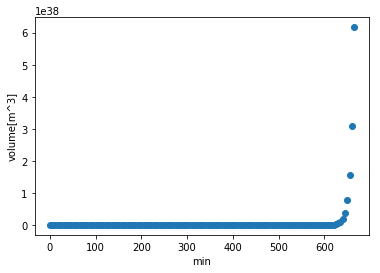

In [60]:
#太陽系を埋め尽くす経過のグラフ
plt.scatter(time_series, time_volume)
plt.xlabel('min')
plt.ylabel('volume[m^3]')

# 考察

In [63]:
#ステップ数 n を求めて以下のようにするほうが、グラフ作成の時間はかかるが、分かりやすい
n=10

t=[i*5 for i in range(n+1)]
t

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [68]:
v=[volume_manjyu*2**i for i in range(n+1)]
v

[0.05654866776461628,
 0.11309733552923255,
 0.2261946710584651,
 0.4523893421169302,
 0.9047786842338604,
 1.8095573684677209,
 3.6191147369354417,
 7.2382294738708834,
 14.476458947741767,
 28.952917895483534,
 57.90583579096707]